In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#Last inn data
file_path_utslipp = "https://github.com/PetterOttersen/milj-dataanalyse/raw/refs/heads/main/Excelfil_utslipp.xlsx"
df = pd.read_excel(file_path_utslipp, engine="openpyxl")
#Dataen inneholder både heltall og tekstrenger. Datasettet ligger i grupper 
#print(df)


#Rydder datasettet, beholder relevante kolonner og fjerner rader for å gjøre videre datahåndtering lettere


df.columns = ['index', 'kilde', 'energiprodukt', 'komponent', 'år', 'statistikkvariabel', 'verdi'] #ai
df = df[['kilde', 'energiprodukt', 'komponent', 'år', 'verdi']] #ai

alle_kilder = df[df['kilde'].str.contains("0 Alle kilder", na=False)].index #retting av ai
df = df.drop(alle_kilder)

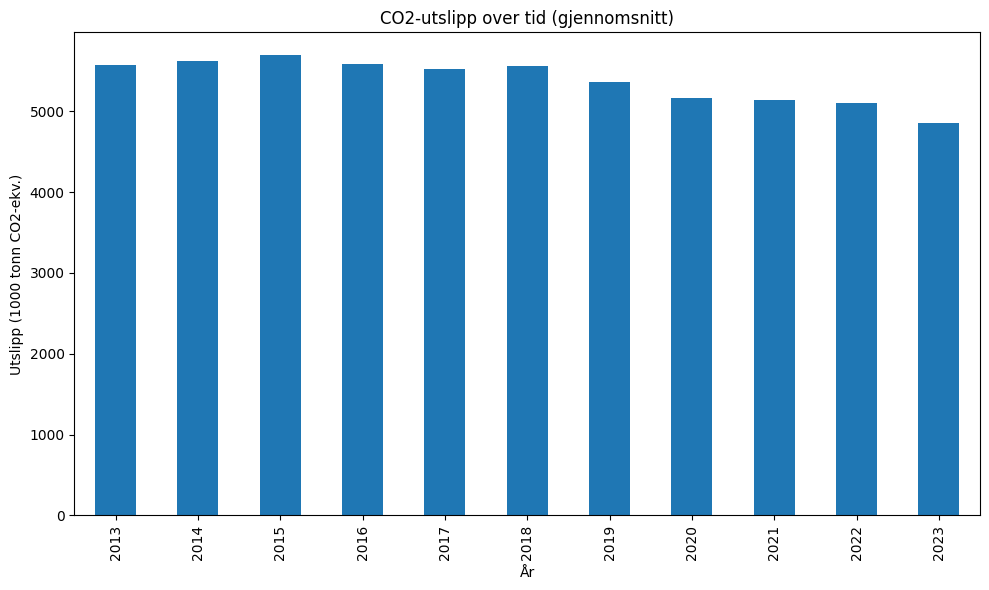

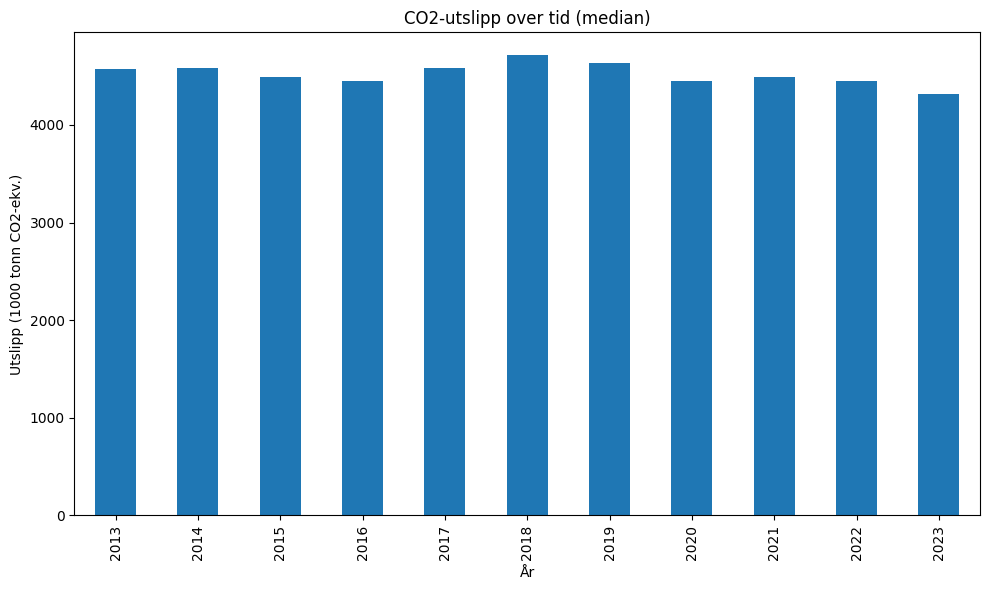

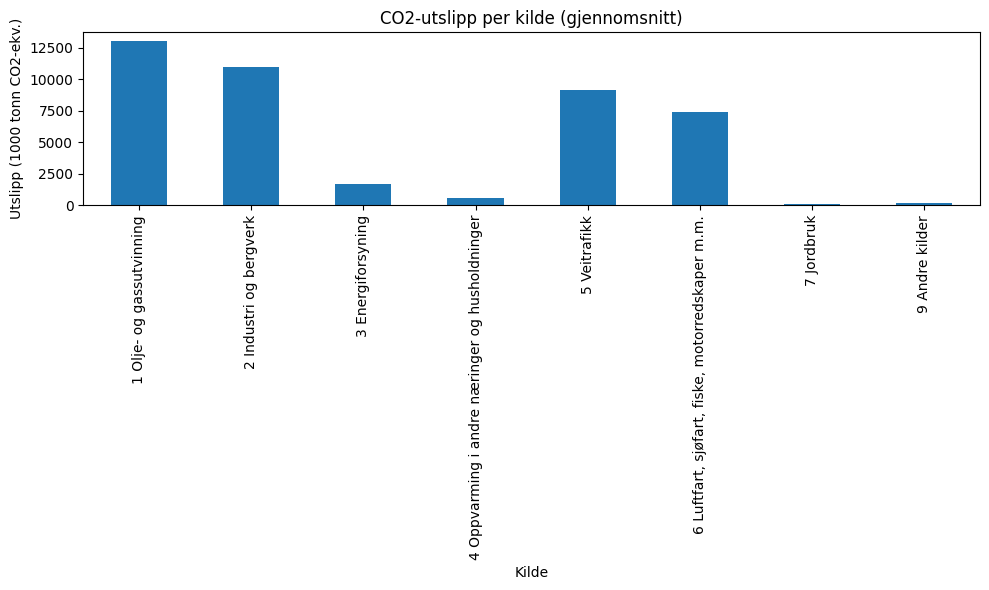

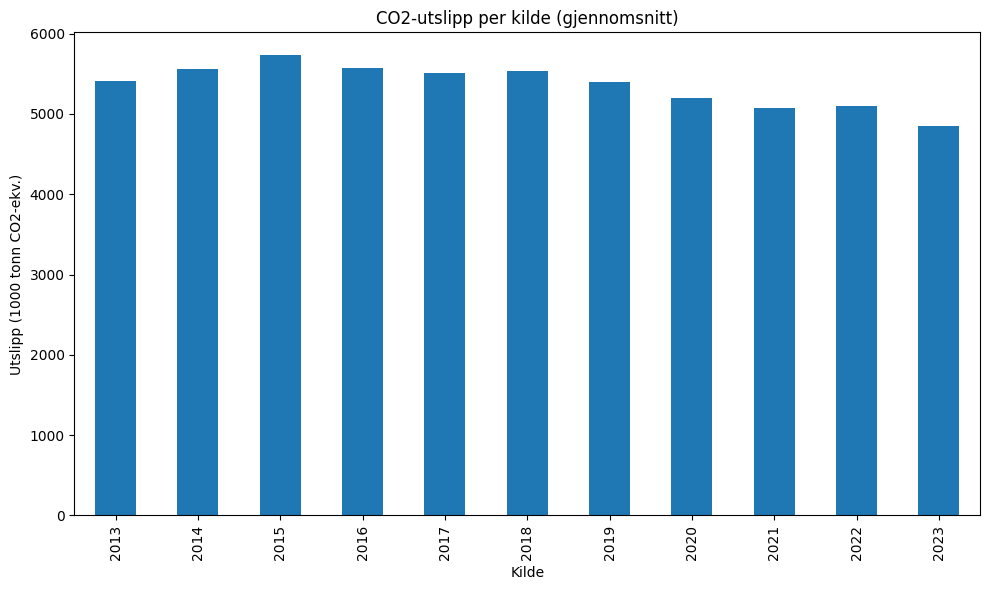

år
2013    5567.500
2014    5622.000
2015    5690.250
2016    5588.375
2017    5524.750
2018    5558.750
2019    5358.125
2020    5159.375
2021    5132.250
2022    5104.250
2023    4858.750
Name: verdi, dtype: float64
år
2013    5415.145770
2014    5563.983902
2015    5729.702604
2016    5577.940325
2017    5505.854229
2018    5529.306072
2019    5400.063583
2020    5199.050928
2021    5078.234050
2022    5096.062955
2023    4853.149809
Name: verdi, dtype: float64


In [ ]:


co2_per_år_gs = df.groupby('år')['verdi'].mean() #gjennomsnittlige utslipp per år #ai
co2_per_år_m = df.groupby('år')['verdi'].median() #median av utslipp per år
co2_per_kilde_m = df.groupby('kilde')['verdi'].mean() #medi
co2_per_år_std = df.groupby('år')['verdi'].std() 






# 7. Visualiser som stolpediagram
plt.figure(figsize=(10, 6))
co2_per_år_gs.plot(kind='bar', title="CO2-utslipp over tid (gjennomsnitt)")
plt.ylabel("Utslipp (1000 tonn CO2-ekv.)")
plt.xlabel("År")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
co2_per_år_m.plot(kind='bar', title="CO2-utslipp over tid (median)")
plt.ylabel("Utslipp (1000 tonn CO2-ekv.)")
plt.xlabel("År")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
co2_per_kilde_m.plot(kind='bar', title="CO2-utslipp per kilde (gjennomsnitt)")
plt.ylabel("Utslipp (1000 tonn CO2-ekv.)")
plt.xlabel("Kilde")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
co2_per_år_std.plot(kind='bar', title="CO2-utslipp per kilde (gjennomsnitt)")
plt.ylabel("Utslipp (1000 tonn CO2-ekv.)")
plt.xlabel("Kilde")
plt.tight_layout()
plt.show()



år
2013    5567.500
2014    5622.000
2015    5690.250
2016    5588.375
2017    5524.750
Name: verdi, dtype: float64
år
2013    5415.145770
2014    5563.983902
2015    5729.702604
2016    5577.940325
2017    5505.854229
Name: verdi, dtype: float64


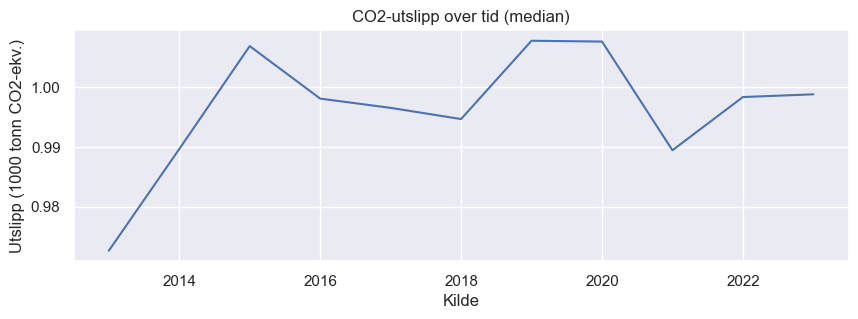

In [122]:
# Observerer at data for gjennomsnittet av utslipp per år og data fra standrarvvik for utslipp per år er veldog lik. Velger å undersøke mer av dette ved å se på den relativet variasjonen mellom standardavvik og gjennomsnitt.

print(co2_per_år_gs.head())
print(co2_per_år_std.head())


CV = co2_per_år_std / co2_per_år_gs
plt.figure(figsize=(10, 3))
plt.grid(True)

CV.plot(title="CO2-utslipp over tid (median)")
plt.ylabel("Utslipp (1000 tonn CO2-ekv.)")
plt.xlabel("Kilde")
plt.show()

Text(0.5, 1.0, 'Varmekart over kilder, år og mengden av utslipp')

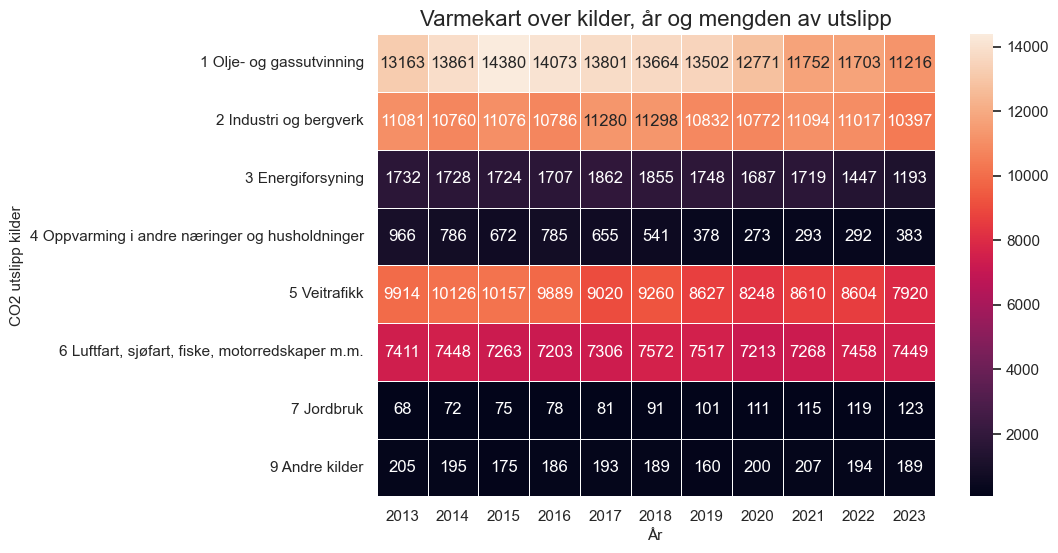

In [123]:

import seaborn as sns
sns.set_theme()

co2_kilde_år_hm = (df.pivot(index="kilde", columns="år", values="verdi"))

f, ax = plt.subplots(figsize=(9, 6))


sns.heatmap(co2_kilde_år_hm, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.xlabel("År",size = 11)        
plt.ylabel("CO2 utslipp kilder", size = 11) 
plt.title("Varmekart over kilder, år og mengden av utslipp",size = 16)

